# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [78]:
#install spacy in the current conda environment
!pip install spacy


In [79]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------ --------------------------------- 2.1/12.8 MB 14.7 MB/s eta 0:00:01
     ----------------- ---------------------- 5.5/12.8 MB 15.2 MB/s eta 0:00:01
     ---------------------------- ----------- 9.2/12.8 MB 15.0 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 15.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [80]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [81]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [82]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \r\nMatter \r\nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [83]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [84]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [85]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [86]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [87]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [88]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [89]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the          11306
to            8480
and           6921
you           6256
of            5028
             ...  
yt               1
ysda             1
youuuuu          1
beavers          1
beaumonts        1
Length: 15289, dtype: int64

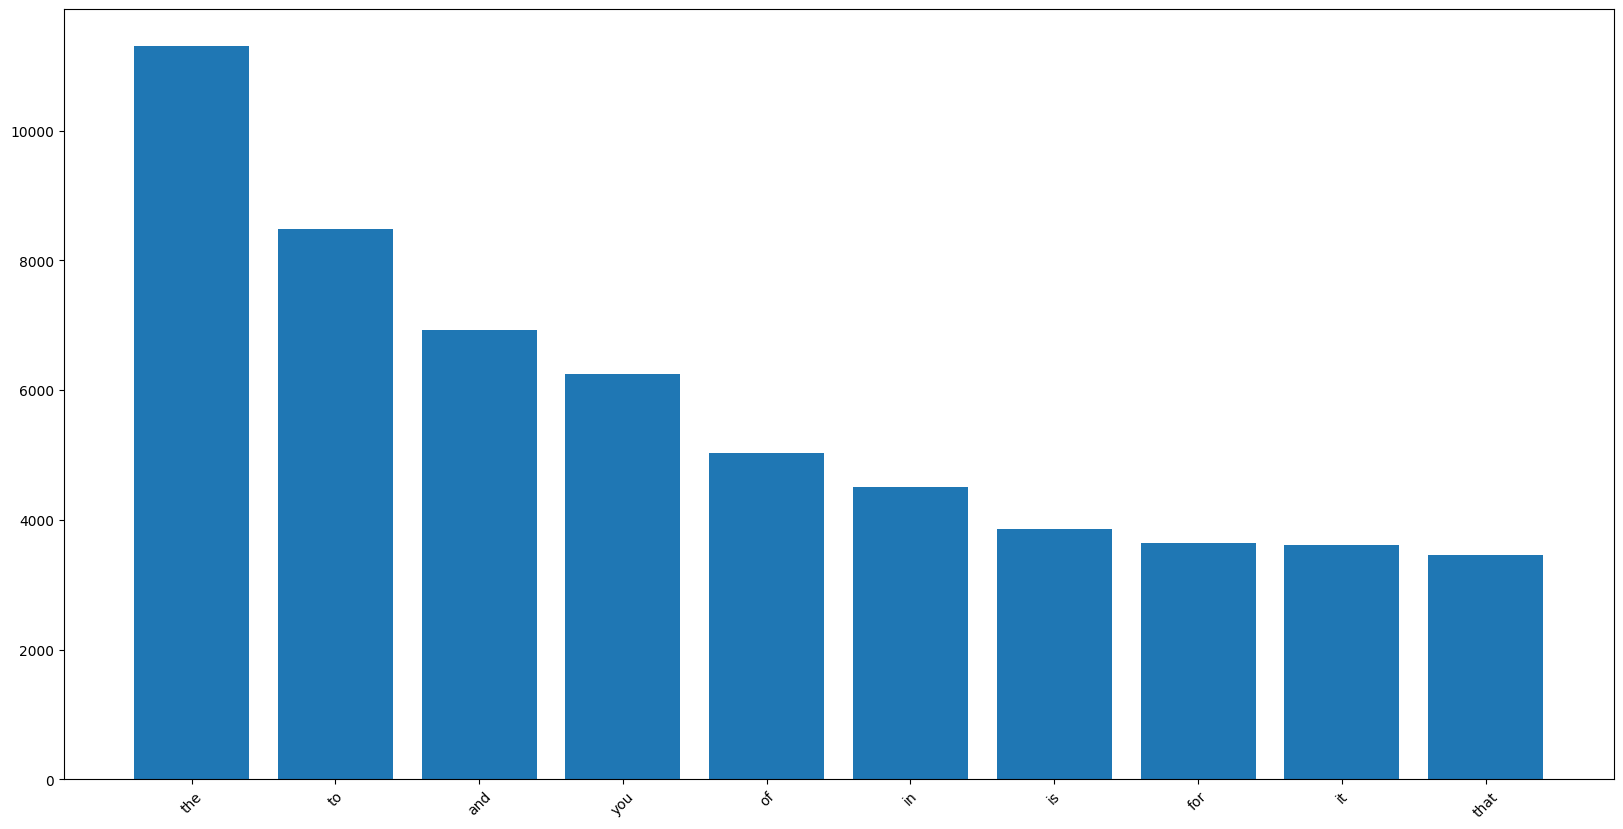

In [91]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: The most frequent words are common words (the, to, and, you, of), but I don’t think these words are meaningful to our learning community.

#### Lemmatization and stopword removal

In [92]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [93]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [94]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [95]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8608 sparse matrix of type '<class 'numpy.int64'>'
	with 126768 stored elements in Compressed Sparse Row format>

In [96]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not            2863
student        1183
like           1183
people         1124
class           988
               ... 
zionism not       3
zingerman         3
zelle             3
able ticket       3
able pay          3
Length: 8608, dtype: int64

In [97]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

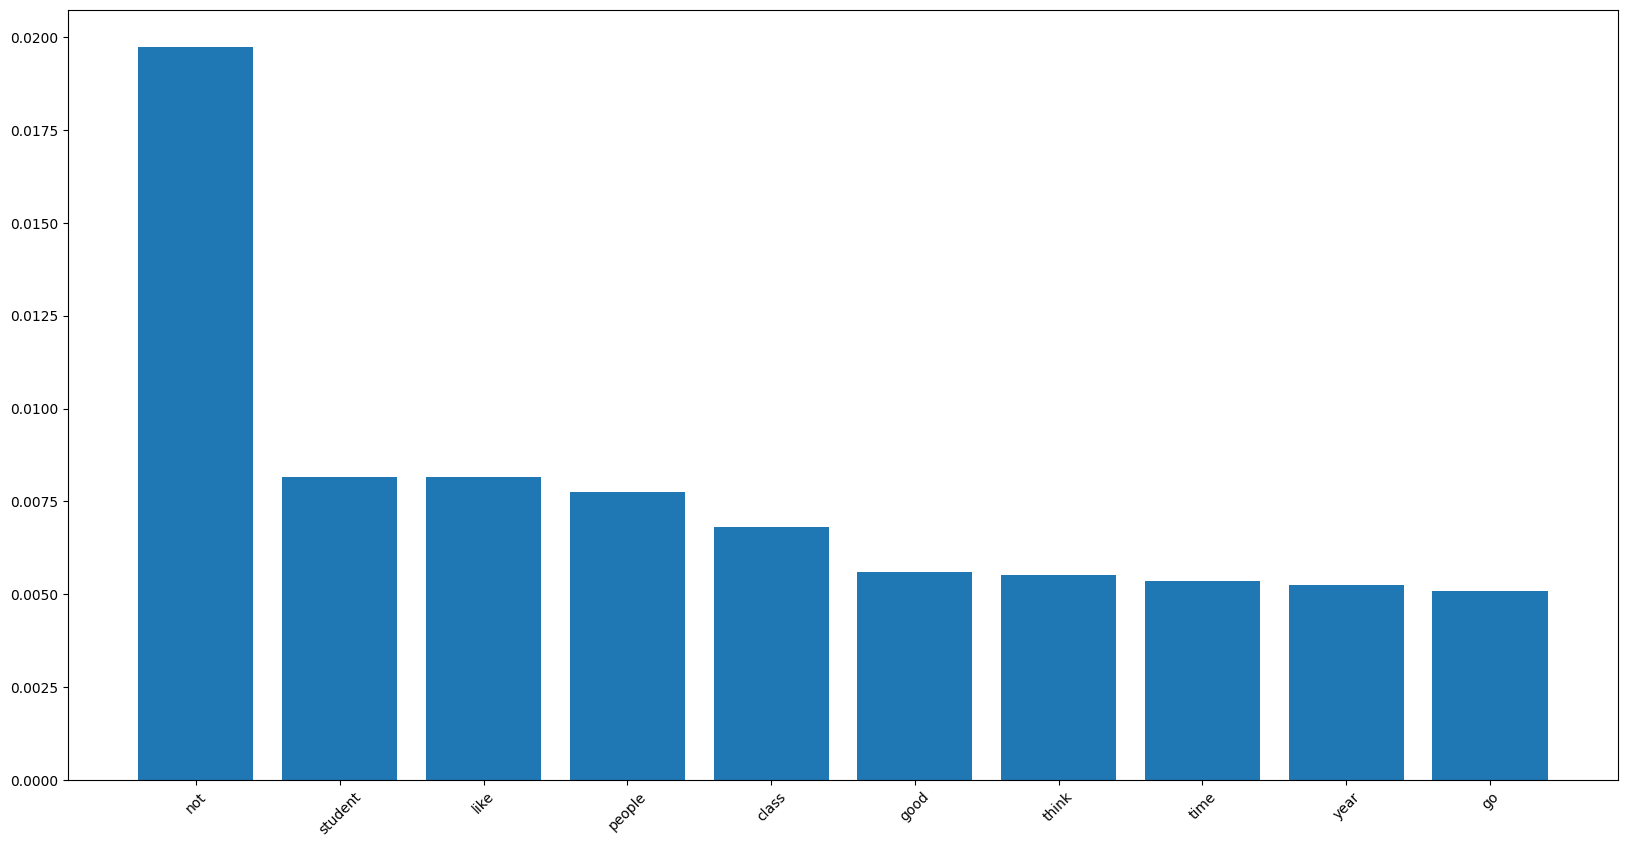

In [98]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [99]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

np.float64(4.1400153180566765e-05)

In [100]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000035
cs                  0.001228
computer            0.000262
dtype: float64

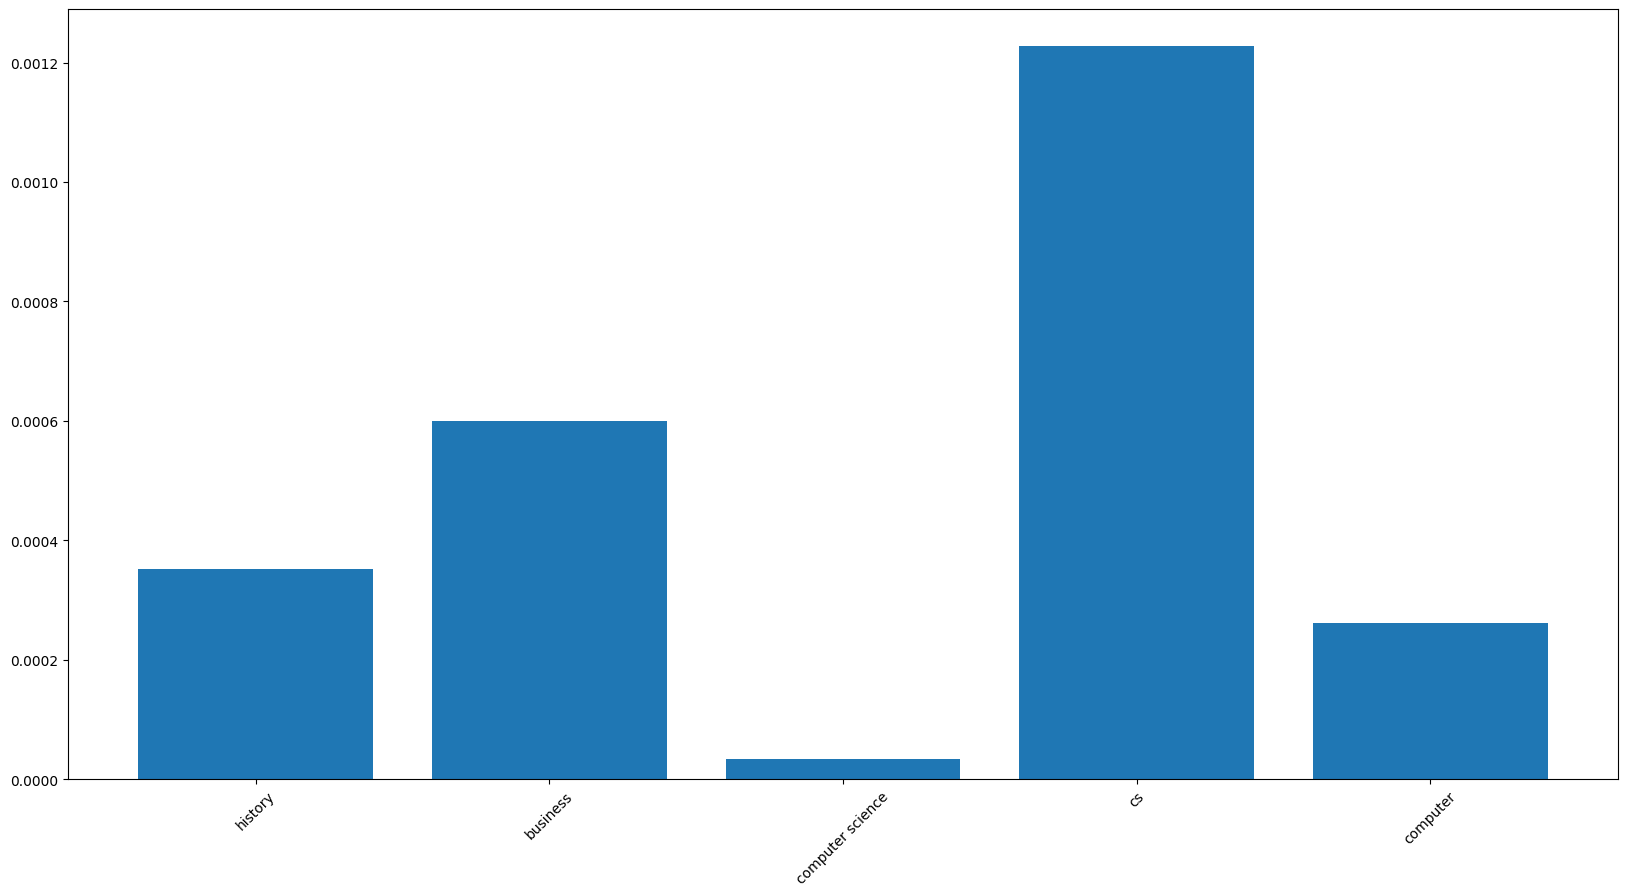

In [101]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [102]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

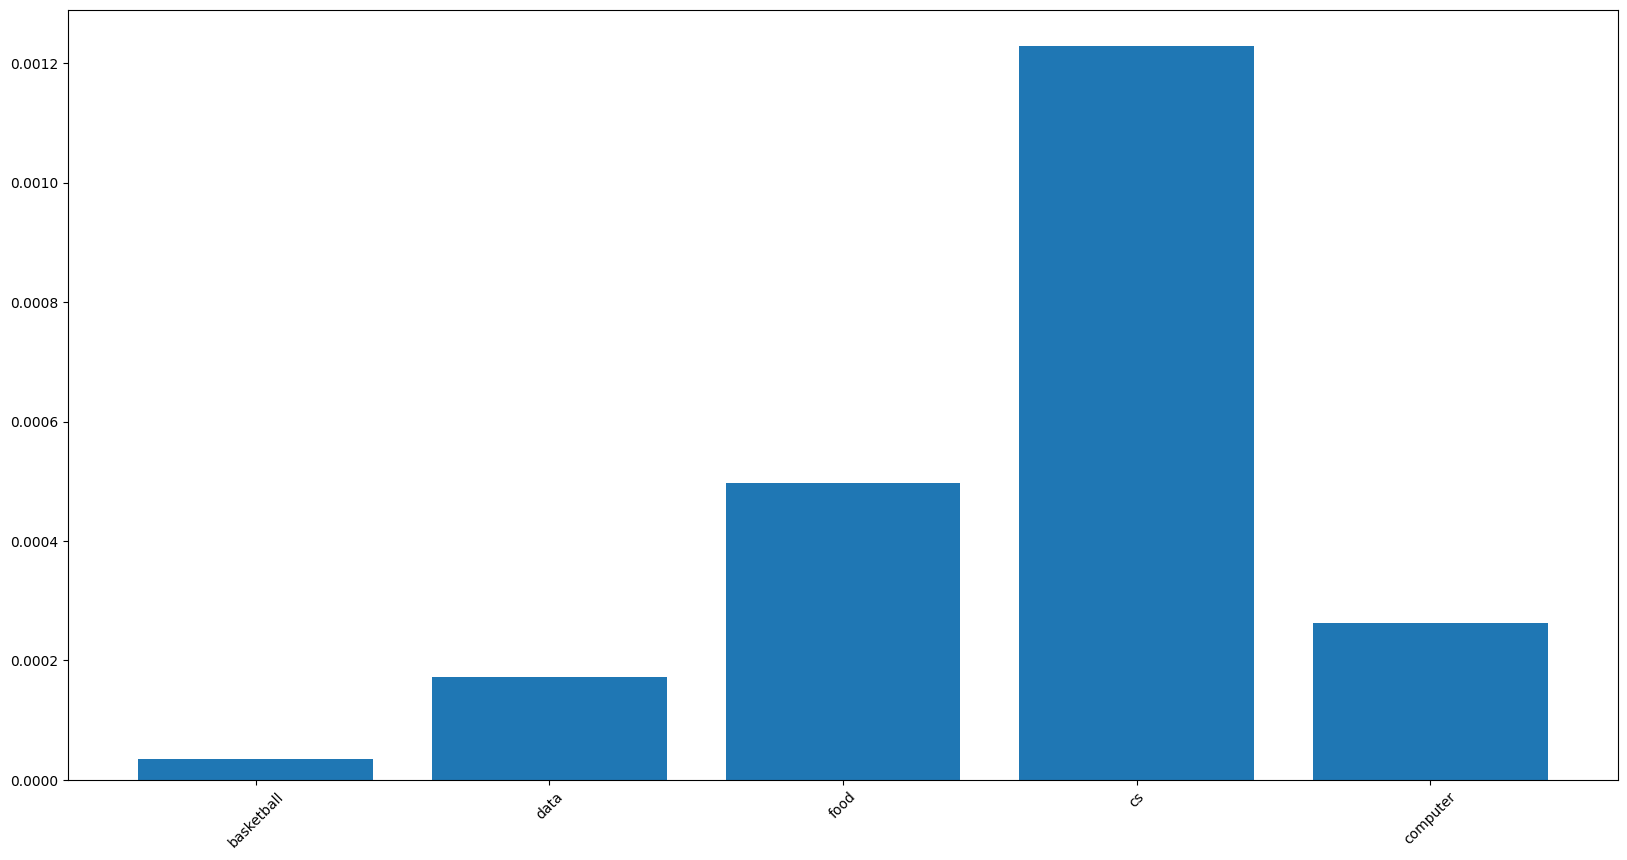

In [103]:
plot_list=word_counts[["basketball", "data", "food", "cs", "computer"]]
plot_list

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

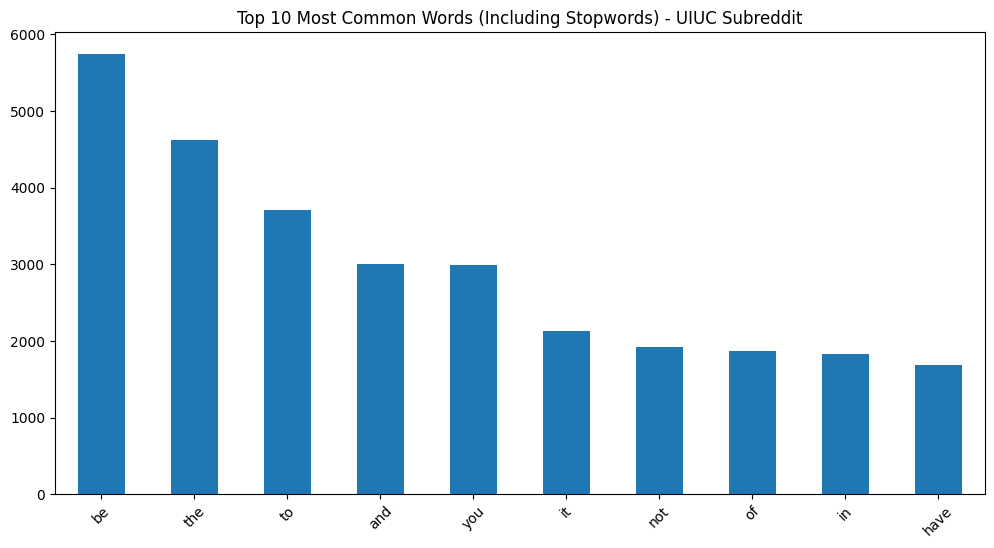

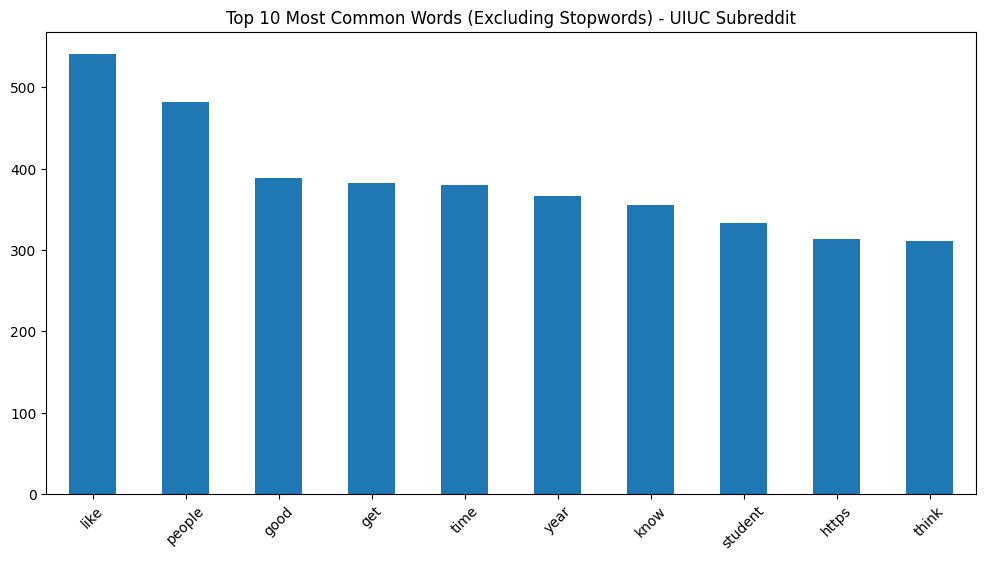

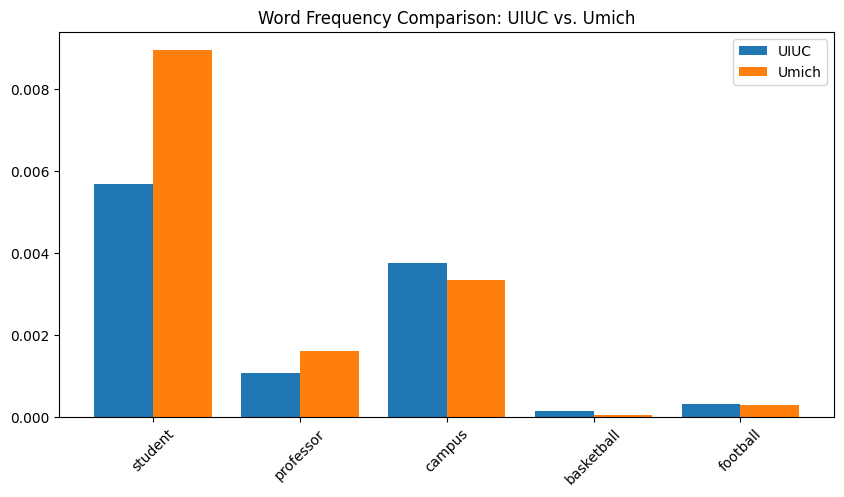

In [77]:
uiuc=pd.read_csv("uiuc.csv")

nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_punct]
    return " ".join(tokens)

uiuc["cleaned_text"] = uiuc["text"].apply(clean_text)


vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(uiuc["cleaned_text"])

bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

word_counts = bow_df.sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
word_counts.head(10).plot(kind="bar")
plt.title("Top 10 Most Common Words (Including Stopwords) - UIUC Subreddit")
plt.xticks(rotation=45)
plt.show()

def clean_text_no_stopwords(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

uiuc["cleaned_text_no_stopwords"] = uiuc["text"].apply(clean_text_no_stopwords)

vectorizer = CountVectorizer()
bag_of_words_no_stop = vectorizer.fit_transform(uiuc["cleaned_text_no_stopwords"])

bow_df_no_stop = pd.DataFrame(bag_of_words_no_stop.toarray(), columns=vectorizer.get_feature_names_out())

word_counts_no_stop = bow_df_no_stop.sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
word_counts_no_stop.head(10).plot(kind="bar")
plt.title("Top 10 Most Common Words (Excluding Stopwords) - UIUC Subreddit")
plt.xticks(rotation=45)
plt.show()

mich = pd.read_csv("umich.csv")
mich["cleaned_text_no_stopwords"] = mich["text"].apply(clean_text_no_stopwords)

mich_bag_of_words = vectorizer.fit_transform(mich["cleaned_text_no_stopwords"])
mich_df = pd.DataFrame(mich_bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
mich_word_counts = mich_df.sum().sort_values(ascending=False)


comparison_words = ["student", "professor", "campus", "basketball", "football"]

uiuc_freq = word_counts_no_stop[comparison_words] / word_counts_no_stop.sum()
mich_freq = mich_word_counts[comparison_words] / mich_word_counts.sum()

fig, ax = plt.subplots(figsize=(10,5))
x = np.arange(len(comparison_words))
ax.bar(x - 0.2, uiuc_freq, width=0.4, label="UIUC")
ax.bar(x + 0.2, mich_freq, width=0.4, label="Umich")
ax.set_xticks(x)
ax.set_xticklabels(comparison_words, rotation=45)
ax.legend()
plt.title("Word Frequency Comparison: UIUC vs. Umich")
plt.show()


### According to this comparison chart, I found that UIUC's subreddit prefers to discuss sports, such as basketball, football, etc., while Umich's subreddit prefers to discuss students and professors. This is very interesting.

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [104]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [105]:
#clean and lemmatize the data csv

def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)


data['cleaned_text'] = data['text'].apply(clean)    


In [106]:
#create a bag of words representation with count vectorizer

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])

bag_of_words

<9450x21333 sparse matrix of type '<class 'numpy.int64'>'
	with 334612 stored elements in Compressed Sparse Row format>

In [ ]:
#train a logistic regression model using the bag of words features as X and the label column as y
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = bag_of_words
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)




LogisticRegression(max_iter=1000)

In [122]:
#report the accuracy of the model
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.7005


#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [123]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 
model.fit(bag_of_words, data['label'])
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9613756613756613


### We can see that this model has 96% accuracy, which is much higher than the 70% above. I think this is because it is using the same data for prediction, while the above model uses brand new (20% of the data) data for prediction.

#### Part 3: Examine the top features of your model using the following code

In [137]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?
feature_names = vectorizer.get_feature_names_out()

In [141]:
coefficients = pd.DataFrame({'feature': feature_names, 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

top_10_negative

,feature,coefficient
20496,wolverine,-1.557725
7099,gsi,-1.595095
14388,ross,-1.601680
6431,fries,-1.634368
16394,texas,-1.720845
5113,eecs,-1.804524
6382,fresno,-1.896995
19067,um,-1.912833
19075,umich,-2.279341
10727,michigan,-2.998170


In [142]:
top_10_positive

,feature,coefficient
19060,uiuc,2.302316
8103,illini,1.766608
8106,illinois,1.765209
19285,urbana,1.717188
7007,grainger,1.629221
4210,danville,1.499715
14406,rsos,1.435980
3280,champaign,1.432921
76,ac,1.375986
3195,carl,1.316077


In [112]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?

We can see that the top 10 positives are highly correlated with UIUC, which is normal. And from the negative side, these are all related to Umich, which is a good distinction between UIUC and other universities.

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [11]:
pip install --upgrade numpy gensim


  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import spacy
import gensim
from gensim import corpora
from gensim.models import LdaModel

In [13]:
nlp = spacy.load("en_core_web_sm")

uiuc = pd.read_csv("uiuc.csv")

def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return tokens

uiuc["tokens"] = uiuc["text"].apply(preprocess_text)

In [14]:
dictionary = corpora.Dictionary(uiuc["tokens"])
corpus = [dictionary.doc2bow(tokens) for tokens in uiuc["tokens"]]

In [15]:
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10, random_state=42)

topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.016*"weather" + 0.016*"\r\n\r\n" + 0.009*"app" + 0.009*"dorm" + 0.009*"need" + 0.009*"campus" + 0.008*"warning" + 0.008*"freshman" + 0.007*"go" + 0.007*"illinois"')
(1, '0.016*"\r\n\r\n" + 0.015*"student" + 0.010*"think" + 0.009*"like" + 0.009*"  " + 0.008*"hard" + 0.008*"need" + 0.007*"class" + 0.007*"cs" + 0.007*"course"')
(2, '0.093*"⠀" + 0.022*"\r\n\r\n" + 0.011*"⣿" + 0.010*"housing" + 0.009*"review" + 0.008*"yes" + 0.008*"lease" + 0.008*">" + 0.007*"state" + 0.007*"\r\n"')
(3, '0.017*"water" + 0.017*"\r\n\r\n" + 0.017*" " + 0.013*"class" + 0.013*"go" + 0.011*"people" + 0.010*"get" + 0.010*"good" + 0.009*"time" + 0.008*"like"')
(4, '0.033*"friend" + 0.030*"people" + 0.019*"feel" + 0.018*"like" + 0.017*"year" + 0.015*"find" + 0.012*"meet" + 0.010*"day" + 0.010*"think" + 0.010*"new"')
(5, '0.011*"hall" + 0.009*"thing" + 0.009*"bike" + 0.009*"good" + 0.009*"buy" + 0.009*"use" + 0.009*"\r\n\r\n" + 0.008*"student" + 0.008*"way" + 0.008*" "')
(6, '0.055*"thank" + 0.021*"😭" + 0.014

In [16]:
def get_topic(doc):
    bow = dictionary.doc2bow(doc)
    topics = lda_model.get_document_topics(bow)
    return max(topics, key=lambda x: x[1])[0]

uiuc["topic"] = uiuc["tokens"].apply(get_topic)

for topic in range(10):
    print(f"\n🔹 Representative Comments for Topic {topic}:")
    print(uiuc[uiuc["topic"] == topic]["text"].sample(3, random_state=42).values)


🔹 Representative Comments for Topic 0:
['Same'
 'Make a habit of using a VPN or the TOR browser. Even if you aren’t doing something sensitive, using them on occasion won’t make the times that matter stand out. That’s one way how the lab hacker got caught so easily some years ago: only using TOR when he was doing bad things.'
 'I like to wing it, now that’s WINGING IT.']

🔹 Representative Comments for Topic 1:
['Dmed'
 'This is exactly why being an RA never once crossed my mind during undergrad. Wouldn’t want to deal with the freshman, the dorms, the food, this situation, all of it. Kudos to all of you for being RAs. You guys are built different\U0001fae1'
 'This issue did not happen to me personally, but I took the Math 241 prof exam today and there were actually a good amount of people that encountered this in the testing room for the 225 and 241 exams. They just had to register manually with the test proctors and then were allowed to take their tests. Not sure if the proctors said t

We can see that these comments are all about campus life and study, so they are very representative.